In [2]:
# Loading Required Packages/Libraries for our project	
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
#-------------------------------------------------------------------------------------------------------------------#
# Loading the Dataset/Table - Wisconsin Breast Cancer																#
#-------------------------------------------------------------------------------------------------------------------#

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

#-------------------------------------------------------------------------------------------------------------------#
# Assigning Label or variable names																					#
#-------------------------------------------------------------------------------------------------------------------#

names = ['scn', 'ct', 'ucs', 'ucsh', 'ma', 'secs', 'bn', 'bc', 'nn', 'mit','class']
dataset = pd.read_csv(url, names=names)


#-------------------------------------------------------------------------------------------------------------------#
# EDA - Understanding the Data 																					    #
#-------------------------------------------------------------------------------------------------------------------#

In [7]:
# 1. To find Number of Observation and Variables in the dataset

dataset.shape

(699, 11)

In [8]:
# 2. To data types of each variable
dataset.dtypes

scn       int64
ct        int64
ucs       int64
ucsh      int64
ma        int64
secs      int64
bn       object
bc        int64
nn        int64
mit       int64
class     int64
dtype: object

In [10]:
# 3. To display first # rows and last # rows
print(dataset.head())
print(dataset.tail())

       scn  ct  ucs  ucsh  ma  secs  bn  bc  nn  mit  class
0  1000025   5    1     1   1     2   1   3   1    1      2
1  1002945   5    4     4   5     7  10   3   2    1      2
2  1015425   3    1     1   1     2   2   3   1    1      2
3  1016277   6    8     8   1     3   4   3   7    1      2
4  1017023   4    1     1   3     2   1   3   1    1      2
        scn  ct  ucs  ucsh  ma  secs bn  bc  nn  mit  class
694  776715   3    1     1   1     3  2   1   1    1      2
695  841769   2    1     1   1     2  1   1   1    1      2
696  888820   5   10    10   3     7  3   8  10    2      4
697  897471   4    8     6   4     3  4  10   6    1      4
698  897471   4    8     8   5     4  5  10   4    1      4


In [11]:
# 5. To find Number of Observation and Variables in the dataset

dataset.shape

(699, 11)

In [13]:
# 11. Calculating descriptive statistics and rounding the decimal to three places

pd.set_option('precision', 3)
dataset.describe()

,scn,ct,ucs,ucsh,ma,secs,bc,nn,mit,class
count,6.990e+02,699.000,699.000,699.000,699.000,699.000,699.000,699.000,699.000,699.000
mean,1.072e+06,4.418,3.134,3.207,2.807,3.216,3.438,2.867,1.589,2.690
std,6.171e+05,2.816,3.051,2.972,2.855,2.214,2.438,3.054,1.715,0.951
min,6.163e+04,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000
25%,8.707e+05,2.000,1.000,1.000,1.000,2.000,2.000,1.000,1.000,2.000
50%,1.172e+06,4.000,1.000,1.000,1.000,2.000,3.000,1.000,1.000,2.000
75%,1.238e+06,6.000,5.000,5.000,4.000,4.000,5.000,4.000,1.000,4.000
max,1.345e+07,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,4.000


In [18]:
# 4. To delete a row based on column condition(Here deleting the row based on column(bn) value (?)
dataset1=dataset[dataset.bn !='?']

In [19]:
# 5. To find Number of Observation and Variables in the dataset

print(dataset1.shape)

(683, 11)


In [20]:
# 7. To check data types of each variable after deleting the rows

print(dataset1.dtypes)


scn       int64
ct        int64
ucs       int64
ucsh      int64
ma        int64
secs      int64
bn       object
bc        int64
nn        int64
mit       int64
class     int64
dtype: object


In [21]:
# 8. To change the datatype of column from Int,float,str and object to required datatypes

dataset1['bn'] = dataset1['bn'].apply(str).apply(int)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# 9. Once again check data types of each variable after doing datatype changes

print(dataset1.dtypes)

scn      int64
ct       int64
ucs      int64
ucsh     int64
ma       int64
secs     int64
bn       int64
bc       int64
nn       int64
mit      int64
class    int64
dtype: object


In [23]:
# 10. To find Number of Observation and Variables in the dataset after data cleaning

print(dataset1.shape)

(683, 11)


In [26]:
# 11. Calculating descriptive statistics and rounding the decimal to three places

pd.set_option('precision', 3)

dataset1.describe()


,scn,ct,ucs,ucsh,ma,secs,bn,bc,nn,mit,class
count,6.830e+02,683.000,683.000,683.000,683.000,683.000,683.000,683.000,683.000,683.000,683.000
mean,1.077e+06,4.442,3.151,3.215,2.830,3.234,3.545,3.445,2.870,1.603,2.700
std,6.206e+05,2.821,3.065,2.989,2.865,2.223,3.644,2.450,3.053,1.733,0.955
min,6.338e+04,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000
25%,8.776e+05,2.000,1.000,1.000,1.000,2.000,1.000,2.000,1.000,1.000,2.000
50%,1.172e+06,4.000,1.000,1.000,1.000,2.000,1.000,3.000,1.000,1.000,2.000
75%,1.239e+06,6.000,5.000,5.000,4.000,4.000,6.000,5.000,4.000,1.000,4.000
max,1.345e+07,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,4.000


In [29]:
# 12. To displaying number of observation in each group(class)

print(dataset1.groupby('class').size())

class
2    444
4    239
dtype: int64


#-------------------------------------------------------------------------------------------------------------------#
# Data Visualizations using different Types of Graphs															    #
#-------------------------------------------------------------------------------------------------------------------#


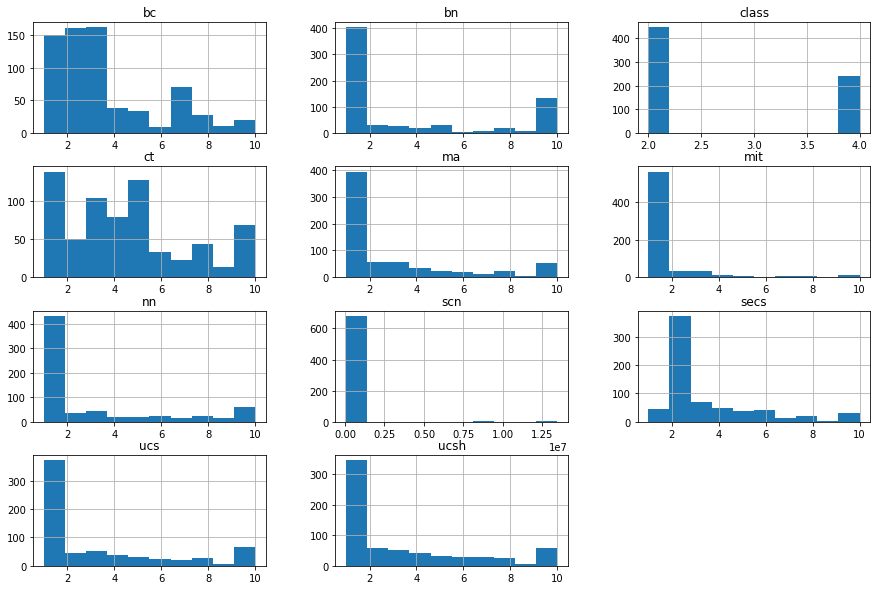

In [30]:
# 13. Plotting Histograms
dataset1.hist(figsize=(15,10))
plt.show()

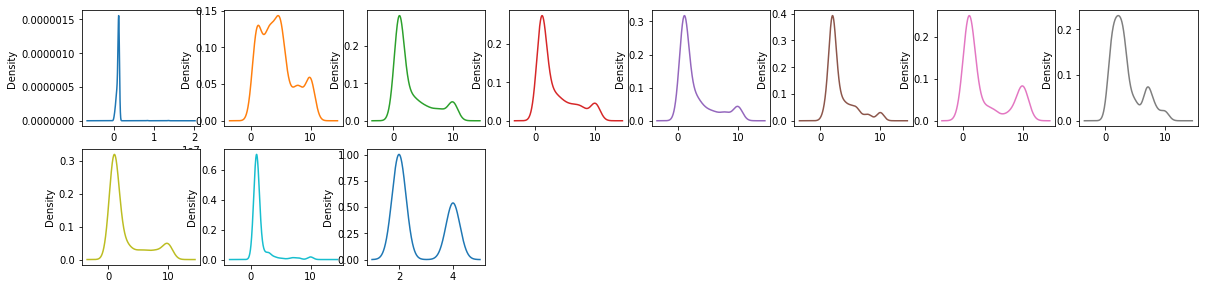

In [31]:
# 14. Plotting Density Graphs
dataset1.plot(kind='density', subplots=True, layout=(8,8),figsize=(20,20), sharex=False, legend=False)
plt.show()

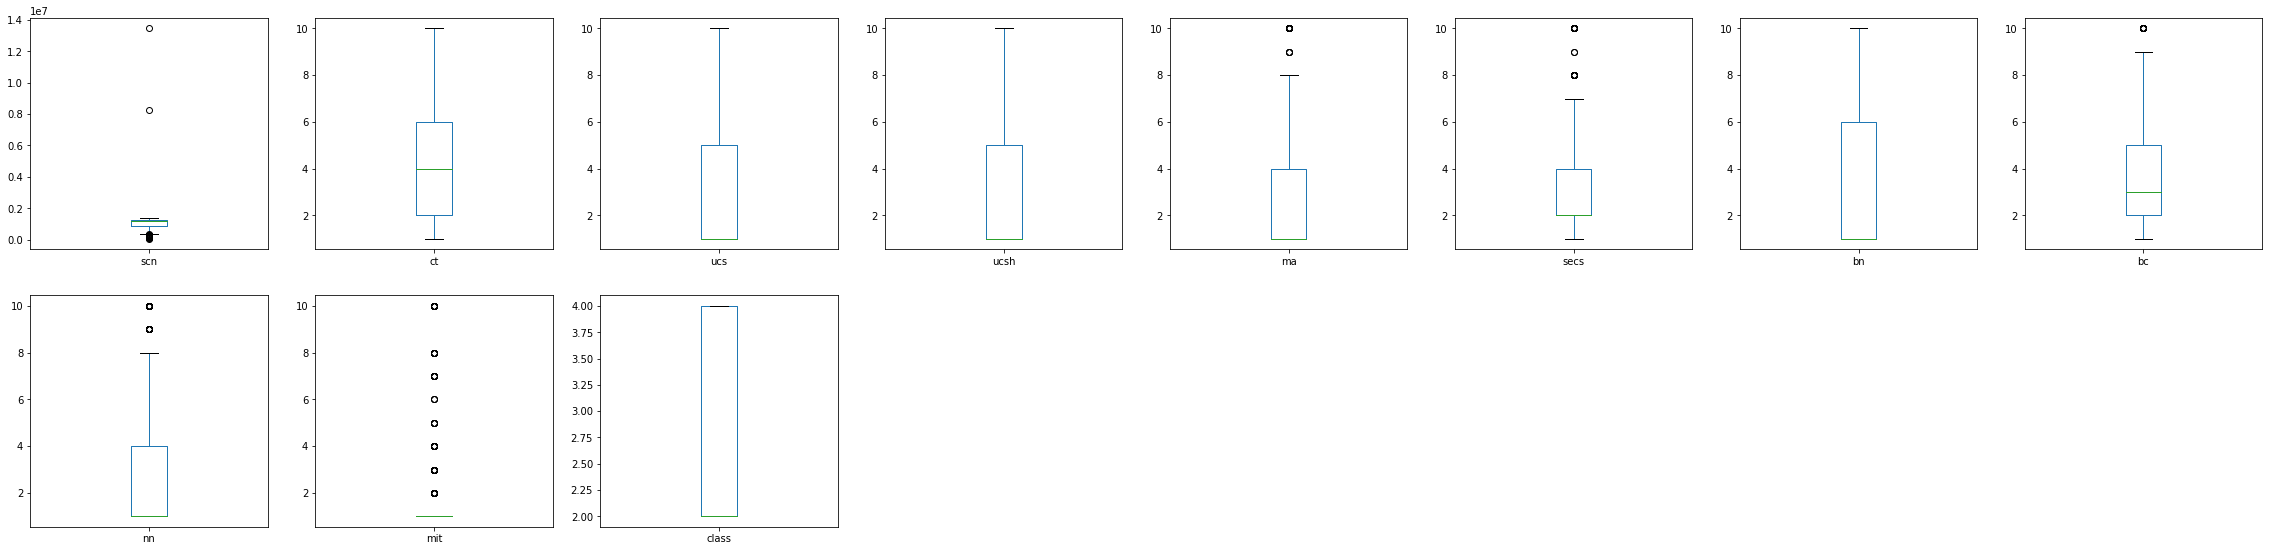

In [33]:
# 15. Plotting box and whisker plots
dataset1.plot(kind='box', subplots=True, layout=(8,8),figsize=(40,40), sharex=False, sharey=False)
plt.show()


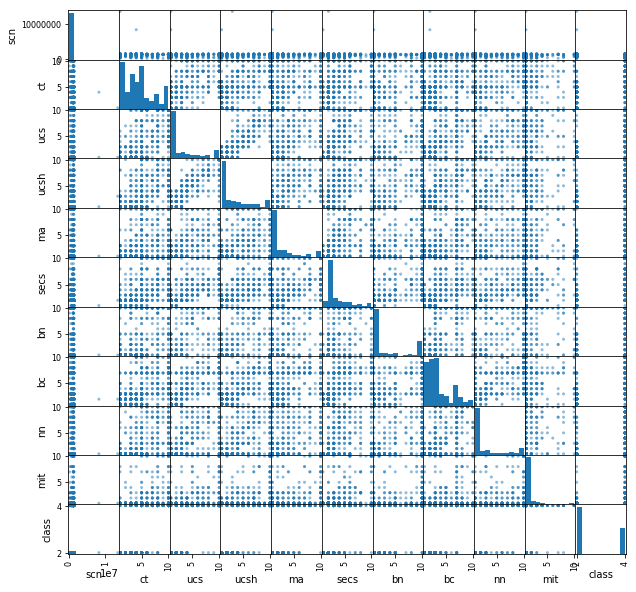

In [34]:
# 16. Plotting scatter plot matrix
scatter_matrix(dataset1,figsize=(10,10))
plt.show()

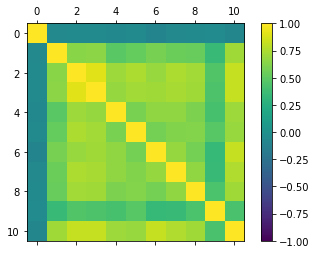

In [35]:
# 17. Plotting correlation matrix

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset1.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()


#-------------------------------------------------------------------------------------------------------------------#
# Preparing/Spliting the data for training(80%) and validation(20%) dataset										    #
#-------------------------------------------------------------------------------------------------------------------#


In [ ]:
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=validation_size, random_state=seed)